In [2]:
from scipy.stats import multinomial
from scipy.special import comb
import numpy as np
import pandas as pd
from math import factorial as f

In [3]:
dist = multinomial(n=3, p=np.full(3, 1/3))
likes = np.array([
    dist.pmf([3, 0, 0]) * f(3)/f(2), # All three rolls the same face
    dist.pmf([2, 1, 0]) * f(3)/f(0), # two rolls same one diff
    dist.pmf([1, 1, 1]) * f(3)/f(3), # all rolls different
])
likes.sum()  
likes[0], 3*(1/3)**3 # 3
likes[2], (3*(1/3)**2)*(2/3) #6
likes[1], 18/27

dist.pmf([3, 0, 0])  # all the dice fall in one
dist.pmf([0, 3, 0])
dist.pmf([0, 0, 3])

0.03703703703703705

In [4]:
dist = multinomial(n=4, p=np.full(4, 1/4))
likes = f(4) * np.array([
    dist.pmf([4, 0, 0, 0]) /f(3),  # all 4 rolls the same face
    dist.pmf([3, 1, 0, 0]) /f(2),  # get three same and one different 
    dist.pmf([2, 2, 0, 0]) /(f(2)*f(2)),  # get two pairs
    dist.pmf([2, 1, 1, 0]) /f(2),  # get two same and the others different each other
    dist.pmf([1, 1, 1, 1]) /f(4)
])
likes.sum()

1.0000000000000002

0.1250000000000004

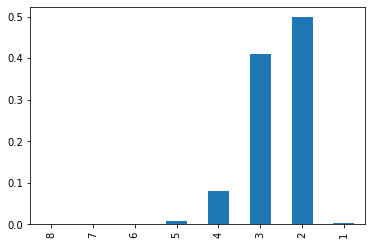

In [10]:
dist = multinomial(n=8, p=np.full(8, 1/8))
likes = np.array([
    dist.pmf([8, 0, 0, 0, 0, 0, 0, 0]) / f(7),  # 8
    dist.pmf([7, 1, 0, 0, 0, 0, 0, 0]) / f(6),  # 7

    # at least 6
    dist.pmf([6, 2, 0, 0, 0, 0, 0, 0]) / f(6),
    dist.pmf([6, 1, 1, 0, 0, 0, 0, 0]) / (f(2)*f(5)),
    
    # At least 5
    dist.pmf([5, 3, 0, 0, 0, 0, 0, 0]) / f(6),
    dist.pmf([5, 2, 1, 0, 0, 0, 0, 0]) / f(5),
    dist.pmf([5, 1, 1, 1, 0, 0, 0, 0]) / (f(3)*f(4)),
    
    # at least 4
    dist.pmf([4, 4, 0, 0, 0, 0, 0, 0]) / (f(2)*f(6)),
    dist.pmf([4, 3, 1, 0, 0, 0, 0, 0]) / f(5),
    dist.pmf([4, 2, 2, 0, 0, 0, 0, 0]) / (f(2)*f(5)),
    dist.pmf([4, 2, 1, 1, 0, 0, 0, 0]) / (f(2)*f(4)),
    dist.pmf([4, 1, 1, 1, 1, 0, 0, 0]) / (f(4)*f(3)),
    
    # At least 3
    dist.pmf([3, 3, 2, 0, 0, 0, 0, 0]) / (f(2)*f(5)),
    dist.pmf([3, 3, 1, 1, 0, 0, 0, 0]) / (f(2)*f(2)*f(4)),
    dist.pmf([3, 2, 2, 1, 0, 0, 0, 0]) / (f(2)*f(4)),
    dist.pmf([3, 2, 1, 1, 1, 0, 0, 0]) / (f(3)*f(3)),
    dist.pmf([3, 1, 1, 1, 1, 1, 0, 0]) / (f(5)*f(2)),
    
    # at least one set of 2
    dist.pmf([2, 2, 2, 2, 0, 0, 0, 0]) / (f(4)*f(4)),
    dist.pmf([2, 2, 2, 1, 1, 0, 0, 0]) / (f(3)*f(3)*f(2)),
    dist.pmf([2, 2, 1, 1, 1, 1, 0, 0]) / (f(2)*f(4)*f(2)),
    dist.pmf([2, 1, 1, 1, 1, 1, 1, 0]) / f(6),
    
    # One
    dist.pmf([1, 1, 1, 1, 1, 1, 1, 1]) / f(8),

])
assert abs(f(8)*likes.sum() - 1) < .000000001
s1 = f(8) * pd.Series(
    [
        likes[0],
        likes[1],
        likes[2:4].sum(),
        likes[4:7].sum(),
        likes[7:12].sum(),
        likes[12: 17].sum(),
        likes[17:21].sum(),  # at least one set of 2
        likes[21],  # at least one set of 1
    ],
    index=[8, 7, 6, 5, 4, 3, 2, 1],
     
)
s1.plot(kind="bar");
s1.mean()


In [12]:
s1

8    4.768372e-07
7    2.670288e-05
6    6.542206e-04
5    9.159088e-03
4    8.002520e-02
3    4.093552e-01
2    4.983759e-01
1    2.403259e-03
dtype: float64